In [1]:
import pandas as pd

eco = pd.read_csv('df_quase_final.csv')
eco.head()

,País,PIB per capita (USD),Pontuação Saúde,Pontuação de Ensino,Pontuação de Pobreza,Investimento em pesquisa e desenvolvimento (% do PIB),Infraestrutura de comércio e transporte,Pobreza incidencia,QI medio,Acesso a eletricidade,...,Crescimento anual PIB,"Propriedade intelectual, pagamentos",Propriedade Intelectual(receitas - pagamentos),Retiradas de água doce anual (% de recursos internos),Índice de preços ao consumidor (CPI),Renda total de recursos naturais (% do PIB),Saldo externo em bens e serviços (USD),Investimento direto estrangeiro liquido (USD),Índice de força dos direitos legais,Índice de Desempenho Logístico
0,Italy,33948.91,84.45,20.41,1.23,1.22,3.779565,19.95,94.23,100.0,...,0.56,7.038212e+11,-6.994875e+11,18.52,108.639445,0.105855,3.392950e+10,1.804440e+10,2.0,3.779565
1,Cyprus,30290.51,82.78,27.94,0.05,0.45,2.945238,14.94,93.39,100.0,...,2.63,4.391340e+10,-4.340938e+10,29.47,103.475302,0.027046,-8.190907e+07,2.111599e+10,7.0,2.945238
2,Spain,28804.45,84.46,24.00,1.01,1.19,3.741782,21.28,93.90,100.0,...,-0.12,5.352979e+11,-5.324029e+11,27.05,108.748356,0.059855,2.958023e+10,3.621561e+10,5.0,3.741782
3,Portugal,23705.13,84.35,17.30,0.72,1.18,3.316710,18.03,92.77,100.0,...,1.30,1.042350e+11,-1.041088e+11,18.29,108.592822,0.215702,-2.844769e+09,9.722494e+09,2.0,3.316710
4,Lithuania,22967.75,84.54,32.70,1.87,0.84,3.047705,20.82,95.89,100.0,...,2.62,4.275180e+10,-4.272561e+10,1.85,114.369868,0.406589,8.996860e+08,1.637085e+09,6.0,3.047705


In [2]:
gov_df = pd.read_csv('pontuaçao_governo1.csv')
infra_df = pd.read_csv('pontuaçao_infraestrutura1.csv')
economia_df = pd.read_csv('pontuaçao_economia1.csv')

# Adicione uma coluna 'País' a cada DataFrame com os valores adequados
infra_df['País'] = eco['País']  # Substitua df pelo DataFrame correto que possui a coluna 'País'
gov_df['País'] = eco['País']  # Substitua df pelo DataFrame correto que possui a coluna 'País'
economia_df['País'] = eco['País']  # Substitua df pelo DataFrame correto que possui a coluna 'País'

# Selecione as colunas desejadas no DataFrame "eco"
colunas_desejadas = ['QI medio', 'Taxa alfabetizaçao total 15+ anos', 'Longevidade total no nascimento',
                     'Mortalidade infantil', 'Investimento em pesquisa e desenvolvimento (% do PIB)',
                     'País', 'Pontuação Saúde', 'Pontuação de Ensino', 'Pontuação de Pobreza']

eco = eco[colunas_desejadas]
eco = eco.merge(infra_df, on='País')
eco = eco.merge(gov_df, on='País')
eco = eco.merge(economia_df, on='País')
# Lista as colunas na ordem desejada
colunas_desejadas = [
    'País', 'Pontuação Saúde', 'Pontuação de Ensino', 'Pontuação de Pobreza',
    'Pontuação Infraestrutura', 'Pontuação Governo', 'Pontuação Economia'
]
# Reorganiza as colunas no DataFrame
eco = eco[colunas_desejadas + [coluna for coluna in eco.columns if coluna not in colunas_desejadas]]
eco['Pontuação Infraestrutura'] = eco['Pontuação Infraestrutura'].round(2)
eco['Pontuação Governo'] = eco['Pontuação Governo'].round(2)
eco['Pontuação Economia'] = eco['Pontuação Economia'].round(2)
eco.head()

,País,Pontuação Saúde,Pontuação de Ensino,Pontuação de Pobreza,Pontuação Infraestrutura,Pontuação Governo,Pontuação Economia,QI medio,Taxa alfabetizaçao total 15+ anos,Longevidade total no nascimento,Mortalidade infantil,Investimento em pesquisa e desenvolvimento (% do PIB)
0,Italy,84.45,20.41,1.23,71.55,39.48,48.73,94.23,99.10,82.8,2.3,1.22
1,Cyprus,82.78,27.94,0.05,53.69,40.68,36.19,93.39,99.02,81.2,2.3,0.45
2,Spain,84.46,24.00,1.01,71.43,43.47,49.17,93.90,98.11,83.2,2.6,1.19
3,Portugal,84.35,17.30,0.72,61.10,46.66,32.27,92.77,95.63,81.1,2.6,1.18
4,Lithuania,84.54,32.70,1.87,53.63,50.35,33.48,95.89,99.82,74.3,2.8,0.84


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Defina as colunas que deseja normalizar
colunas_normalizar = ['Taxa alfabetizaçao total 15+ anos', 'Longevidade total no nascimento', 'Mortalidade infantil', 'Investimento em pesquisa e desenvolvimento (% do PIB)']

# Crie uma instância do MinMaxScaler com a faixa padrão (0 a 1)
scaler = MinMaxScaler()

# Normalize apenas as colunas desejadas
eco[colunas_normalizar] = scaler.fit_transform(eco[colunas_normalizar])

# Ajuste os valores normalizados para variar de 0 a 100
min_value_desired = 0
max_value_desired = 100
eco[colunas_normalizar] = eco[colunas_normalizar] * (max_value_desired - min_value_desired) + min_value_desired

eco.head()

,País,Pontuação Saúde,Pontuação de Ensino,Pontuação de Pobreza,Pontuação Infraestrutura,Pontuação Governo,Pontuação Economia,QI medio,Taxa alfabetizaçao total 15+ anos,Longevidade total no nascimento,Mortalidade infantil,Investimento em pesquisa e desenvolvimento (% do PIB)
0,Italy,84.45,20.41,1.23,71.55,39.48,48.73,94.23,98.640599,98.671096,0.538600,100.000000
1,Cyprus,82.78,27.94,0.05,53.69,40.68,36.19,93.39,98.518405,93.355482,0.538600,36.363636
2,Spain,84.46,24.00,1.01,71.43,43.47,49.17,93.90,97.128456,100.000000,1.077199,97.520661
3,Portugal,84.35,17.30,0.72,61.10,46.66,32.27,92.77,93.340461,93.023256,1.077199,96.694215
4,Lithuania,84.54,32.70,1.87,53.63,50.35,33.48,95.89,99.740339,70.431894,1.436266,68.595041


In [4]:
# Defina os pesos
peso_taxa_alfabetizacao = 50
peso_pontuacao_ensino = 100

# Calcule a média ponderada e atribua o resultado a "Pontuação de Ensino"
eco['Pontuação de Ensino'] = (eco['Taxa alfabetizaçao total 15+ anos'] * peso_taxa_alfabetizacao +
                              eco['Pontuação de Ensino'] * peso_pontuacao_ensino) / (peso_taxa_alfabetizacao + peso_pontuacao_ensino)


# Exclua a coluna "Taxa alfabetização total 15+ anos"
eco.drop(columns=['Taxa alfabetizaçao total 15+ anos'], inplace=True)

eco.head()

,País,Pontuação Saúde,Pontuação de Ensino,Pontuação de Pobreza,Pontuação Infraestrutura,Pontuação Governo,Pontuação Economia,QI medio,Longevidade total no nascimento,Mortalidade infantil,Investimento em pesquisa e desenvolvimento (% do PIB)
0,Italy,84.45,46.486866,1.23,71.55,39.48,48.73,94.23,98.671096,0.538600,100.000000
1,Cyprus,82.78,51.466135,0.05,53.69,40.68,36.19,93.39,93.355482,0.538600,36.363636
2,Spain,84.46,48.376152,1.01,71.43,43.47,49.17,93.90,100.000000,1.077199,97.520661
3,Portugal,84.35,42.646820,0.72,61.10,46.66,32.27,92.77,93.023256,1.077199,96.694215
4,Lithuania,84.54,55.046780,1.87,53.63,50.35,33.48,95.89,70.431894,1.436266,68.595041


In [5]:

peso_Longevidade_total_no_nascimento= 28
peso_Mortalidade_infantil= -28
peso_pontuacao_saude = 44

# Calcule a média ponderada e atribua o resultado a "Pontuação Saúde"
eco['Pontuação Saúde'] = (eco['Longevidade total no nascimento'] * peso_Longevidade_total_no_nascimento + 
                         eco['Mortalidade infantil'] * peso_Mortalidade_infantil + 
                         eco['Pontuação Saúde'] * peso_pontuacao_saude) / (peso_Longevidade_total_no_nascimento + 
                         peso_Mortalidade_infantil + peso_pontuacao_saude)

# Normalize a coluna "Pontuação Saúde" para variar de 0 a 100
min_value = eco['Pontuação Saúde'].min()
max_value = eco['Pontuação Saúde'].max()
eco['Pontuação Saúde'] = 100 * (eco['Pontuação Saúde'] - min_value) / (max_value - min_value)

# Exclua as colunas originais usadas para o cálculo
eco.drop(columns=['Longevidade total no nascimento', 'Mortalidade infantil'], inplace=True)

eco.head()


,País,Pontuação Saúde,Pontuação de Ensino,Pontuação de Pobreza,Pontuação Infraestrutura,Pontuação Governo,Pontuação Economia,QI medio,Investimento em pesquisa e desenvolvimento (% do PIB)
0,Italy,99.654516,46.486866,1.23,71.55,39.48,48.73,94.23,100.000000
1,Cyprus,96.251229,51.466135,0.05,53.69,40.68,36.19,93.39,36.363636
2,Spain,100.000000,48.376152,1.01,71.43,43.47,49.17,93.90,97.520661
3,Portugal,96.935460,42.646820,0.72,61.10,46.66,32.27,92.77,96.694215
4,Lithuania,87.226174,55.046780,1.87,53.63,50.35,33.48,95.89,68.595041


In [6]:

peso_Investimento_pesquisa = 20
peso_pontuacao_governo = 80

eco['Pontuação Governo'] = eco['Investimento em pesquisa e desenvolvimento (% do PIB)'] * peso_Investimento_pesquisa +  eco['Pontuação Governo'] * peso_pontuacao_governo / (peso_Investimento_pesquisa  + peso_pontuacao_governo )

min_value = eco['Pontuação Governo'].min()
max_value = eco['Pontuação Governo'].max()
eco['Pontuação Governo'] = 100 * (eco['Pontuação Governo'] - min_value) / (max_value - min_value)

# Exclua as colunas originais usadas para o cálculo
eco.drop(columns=['Investimento em pesquisa e desenvolvimento (% do PIB)'], inplace=True)

eco.head()


,País,Pontuação Saúde,Pontuação de Ensino,Pontuação de Pobreza,Pontuação Infraestrutura,Pontuação Governo,Pontuação Economia,QI medio
0,Italy,99.654516,46.486866,1.23,71.55,100.000000,48.73,94.23
1,Cyprus,96.251229,51.466135,0.05,53.69,36.811744,36.19,93.39
2,Spain,100.000000,48.376152,1.01,71.43,97.694857,49.17,93.90
3,Portugal,96.935460,42.646820,0.72,61.10,97.000408,32.27,92.77
4,Lithuania,87.226174,55.046780,1.87,53.63,69.224710,33.48,95.89


In [7]:
# Lista de colunas a serem normalizadas
colunas_normalizar = ['Pontuação Saúde', 'Pontuação de Ensino', 'Pontuação de Pobreza', 
                      'Pontuação Infraestrutura', 'Pontuação Governo', 'Pontuação Economia']

# Função para normalizar uma coluna
def normalize_column(df, column_name, min_value_desired, max_value_desired):
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    df[column_name] = (max_value_desired - min_value_desired) * (df[column_name] - min_value) / (max_value - min_value) + min_value_desired

# Normalize as colunas na lista
for coluna in colunas_normalizar:
    normalize_column(eco, coluna, 0, 100)

eco.rename(columns={'Pontuação de Ensino': 'Pontuação Educação', 'QI medio': 'QI médio', 'Pontuação de Pobreza': 'Pontuação Pobreza'}, inplace=True)
eco.head()

,País,Pontuação Saúde,Pontuação Educação,Pontuação Pobreza,Pontuação Infraestrutura,Pontuação Governo,Pontuação Economia,QI médio
0,Italy,99.654516,80.113370,1.815105,100.000000,100.000000,91.499227,94.23
1,Cyprus,96.251229,88.973971,0.000000,74.968465,36.811744,43.044822,93.39
2,Spain,100.000000,83.475351,1.476696,99.831815,97.694857,93.199382,93.90
3,Portugal,96.935460,73.280015,1.030611,85.353889,97.000408,27.897991,92.77
4,Lithuania,87.226174,95.345722,2.799569,74.884373,69.224710,32.573416,95.89


In [8]:
# Defina os pesos das colunas
peso_saude = 1
peso_educacao = 1
peso_pobreza = 0.9
peso_infraestrutura = 1.1
peso_governo = 0.9  # Peso menor para Governo
peso_economia = 1.1  # Peso maior para Economia

eco['Indice de Desenv.'] = (
    (eco['Pontuação Saúde'] * peso_saude +
     eco['Pontuação Educação'] * peso_educacao +
     eco['Pontuação Infraestrutura'] * peso_infraestrutura +
     eco['Pontuação Governo'] * peso_governo +
     eco['Pontuação Economia'] * peso_economia -
     eco['Pontuação Pobreza'] * peso_pobreza) /
    (peso_saude + peso_educacao + peso_infraestrutura + peso_governo + peso_economia + peso_pobreza)
)


# Exclua as colunas de pontuação individuais e "Pontuação Pobreza"
colunas_pontuacao = [
    'Pontuação Saúde',
    'Pontuação Educação',
    'Pontuação Pobreza',
    'Pontuação Infraestrutura',
    'Pontuação Governo',
    'Pontuação Economia'
]
eco.drop(columns=colunas_pontuacao, inplace=True)
eco = eco[eco['País'] != 'Cyprus']
eco['Indice de Desenv.'] = eco['Indice de Desenv.'].round(2)
eco = eco.sort_values(by='Indice de Desenv.', ascending=False)
eco = eco.reset_index(drop=True)
eco['Ranking Desenv.'] = eco.index + 1
eco['Ranking Desenv.'] = eco['Ranking Desenv.'].apply(lambda x: f"{x}º")
eco['Ranking QI médio'] = eco['QI médio'].rank(ascending=False, method='min').astype(int).apply(lambda x: f"{x}º")
eco = eco[['País', 'Ranking Desenv.', 'Indice de Desenv.', 'Ranking QI médio', 'QI médio']]
#eco = eco.set_index('País')

display(eco)

,País,Ranking Desenv.,Indice de Desenv.,Ranking QI médio,QI médio
0,Spain,1º,80.40,5º,93.90
1,Italy,2º,79.80,4º,94.23
2,Portugal,3º,63.53,6º,92.77
3,Lithuania,4º,60.09,1º,95.89
4,Brazil,5º,59.42,23º,83.38
5,Croatia,6º,56.86,2º,95.75
6,South Africa,7º,56.09,43º,68.87
7,Latvia,8º,54.76,3º,94.79
8,Chile,9º,53.89,15º,87.89
9,Serbia,10º,53.52,11º,89.60


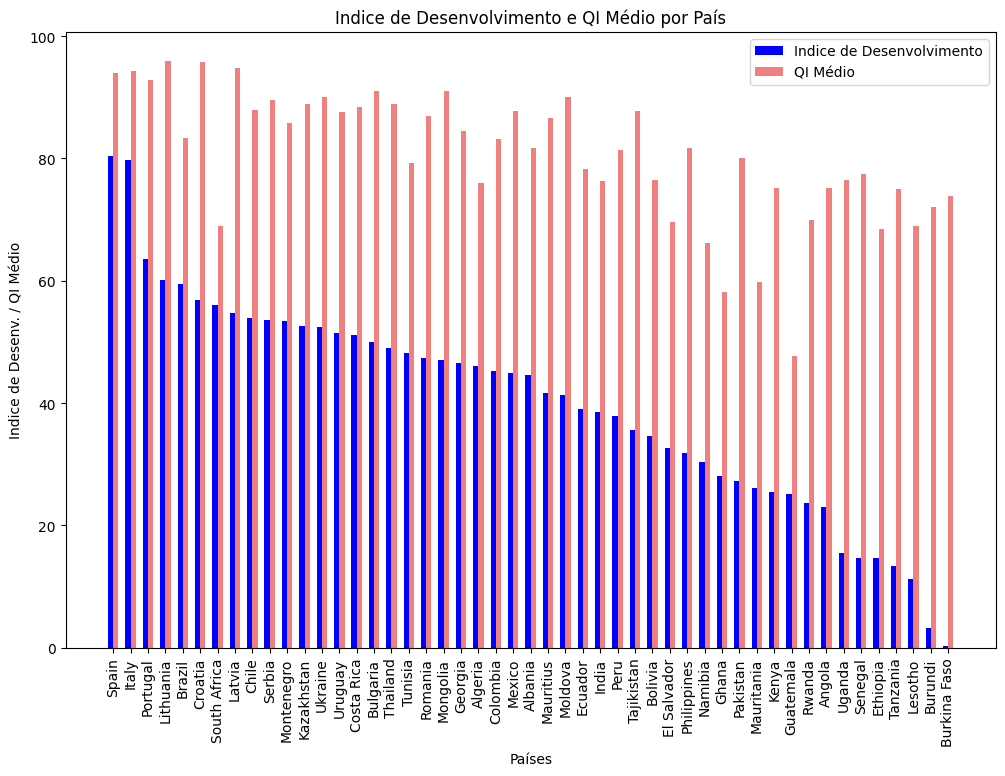

In [9]:
import matplotlib.pyplot as plt

# Definir a largura das barras
largura_barra = 0.3

# Criar um array com os índices para as barras
indices = range(len(eco))

# Criar um gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
plt.bar(indices, eco['Indice de Desenv.'], largura_barra, label='Indice de Desenvolvimento', color='blue')
plt.bar([i + largura_barra for i in indices], eco['QI médio'], largura_barra, label='QI Médio', color='lightcoral')

# Personalizar o gráfico
plt.xlabel('Países')
plt.ylabel('Indice de Desenv. / QI Médio')
plt.title('Indice de Desenvolvimento e QI Médio por País')
plt.xticks([i + largura_barra / 2 for i in indices], eco['País'], rotation=90)
plt.legend()

# Mostrar o gráfico
plt.show()


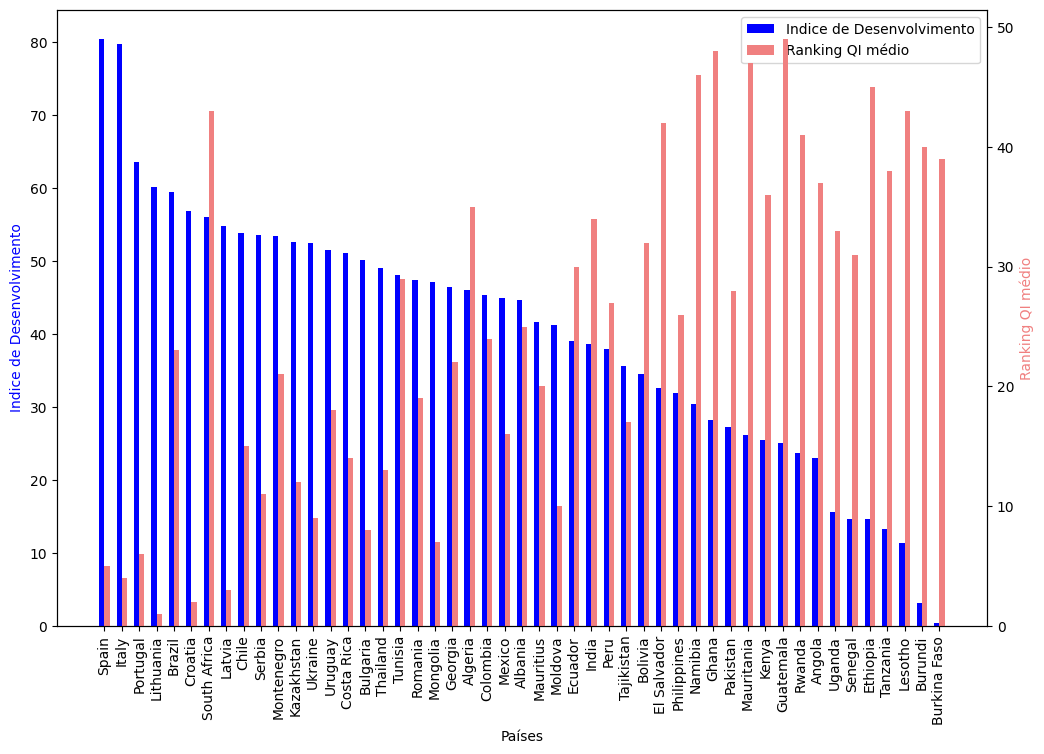

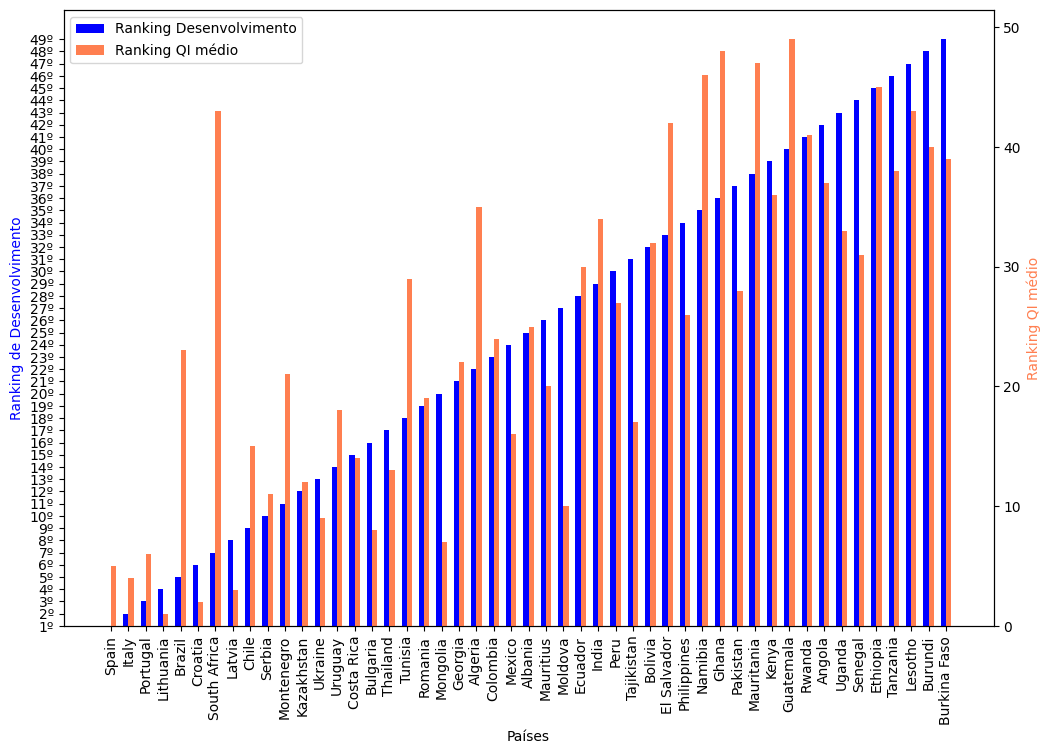

In [10]:
def extrair_ranking(valor):
    try:
        return int(''.join(filter(str.isdigit, valor)))
    except:
        return 0  # Valor padrão se a conversão falhar

# Aplicar a função de extração aos valores do ranking de QI médio
eco['Ranking QI médio'] = eco['Ranking QI médio'].apply(extrair_ranking)

largura_barra = 0.3

# Criar um array com os índices para as barras
indices = range(len(eco))

# Criar um gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(indices, eco['Indice de Desenv.'], largura_barra, label='Indice de Desenvolvimento', color='blue')
ax.set_xlabel('Países')
ax.set_ylabel('Indice de Desenvolvimento', color='blue')

# Criar o segundo eixo Y
ax2 = ax.twinx()
bar2 = ax2.bar([i + largura_barra for i in indices], eco['Ranking QI médio'], largura_barra, label='Ranking QI médio', color='lightcoral')
ax2.set_ylabel('Ranking QI médio', color='lightcoral')

# Personalizar o gráfico
ax.set_xticks([i + largura_barra / 2 for i in indices])
ax.set_xticklabels(eco['País'], rotation=90)
ax.legend([bar1, bar2], ['Indice de Desenvolvimento', 'Ranking QI médio'])

# Mostrar o gráfico
plt.show()


# Criar um gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(indices, eco['Ranking Desenv.'], largura_barra, label='Ranking de Desenvolvimento', color='blue')
ax.set_xlabel('Países')
ax.set_ylabel('Ranking de Desenvolvimento', color='blue')

# Criar o segundo eixo Y
ax2 = ax.twinx()
bar2 = ax2.bar([i + largura_barra for i in indices], eco['Ranking QI médio'], largura_barra, label='Ranking QI médio', color='coral')
ax2.set_ylabel('Ranking QI médio', color='coral')

# Personalizar o gráfico
ax.set_xticks([i + largura_barra / 2 for i in indices])
ax.set_xticklabels(eco['País'], rotation=90)
ax.legend([bar1, bar2], ['Ranking Desenvolvimento', 'Ranking QI médio'])

# Mostrar o gráfico
plt.show()
